In [42]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
            
        # See if it converges
        errors = np.append(errors, np.linalg.norm(x_new - x, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, errors
        x = x_new
    return x, max_iterations, errors

In [52]:
def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iterations):
        x_new = x.copy()
        
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
            
        errors = np.append(errors, np.linalg.norm(x_new - x, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, errors
        x = x_new
    return x, max_iterations, errors

In [53]:
A = np.array([[3, -0.1, -0.2],
             [0.1, 7, -0.3],
             [0.3, -0.2, 10]], dtype=float)

b = np.array([7.85, -19.3, 71.4], dtype=float)
x0 = np.zeros_like(b, dtype=float)
max_iterations = 100

In [54]:
tol = 10e-3
solution, iterations, error = jacobi(A, b, x0, tol, max_iterations)
jacobi1_conv = error

print("Jacobi Tolerance:", tol)
print(f"Jacobi Solution: {solution}")
print(f"Iterations: {iterations}")

tol = 10e-3
solution, iterations, error = gauss_seidel(A, b, x0, tol, max_iterations)
gauss1_conv = error

print("Gauss Tolerance:", tol)
print(f"Gauss Solution: {solution}")
print(f"Iterations: {iterations}")

Jacobi Tolerance: 0.01
Jacobi Solution: [ 3.0000225  -2.50000266  6.99998104]
Iterations: 3
Gauss Tolerance: 0.01
Gauss Solution: [ 3.0000319  -2.49998799  6.99999928]
Iterations: 2


In [55]:
tol = 10e-6
solution, iterations, error = jacobi(A, b, x0, tol, max_iterations)
jacobi2_conv = error

print("Jacobi Tolerance:", tol)
print(f"Jacobi Solution: {solution}")
print(f"Iterations: {iterations}")

tol = 10e-6
solution, iterations, error = gauss_seidel(A, b, x0, tol, max_iterations)
gauss2_conv = error

print("Gauss-Seidel Tolerance:", tol)
print(f"Gauss-Seidel Solution: {solution}")
print(f"Iterations: {iterations}")

Jacobi Tolerance: 1e-05
Jacobi Solution: [ 2.99999991 -2.50000001  7.00000002]
Iterations: 5
Gauss-Seidel Tolerance: 1e-05
Gauss-Seidel Solution: [ 3.  -2.5  7. ]
Iterations: 4


In [56]:
tol = 10e-9
solution, iterations, error = jacobi(A, b, x0, tol, max_iterations)
jacobi3_conv = error

print("Jacobi Tolerance:", tol)
print(f"Jacobi Solution: {solution}")
print(f"Iterations: {iterations}")

tol = 10e-9
solution, iterations, error = gauss_seidel(A, b, x0, tol, max_iterations)
gauss3_conv = error

print("Gauss-Seidel Tolerance:", tol)
print(f"Gauss-Seidel Solution: {solution}")
print(f"Iterations: {iterations}")

Jacobi Tolerance: 1e-08
Jacobi Solution: [ 3.  -2.5  7. ]
Iterations: 7
Gauss-Seidel Tolerance: 1e-08
Gauss-Seidel Solution: [ 3.  -2.5  7. ]
Iterations: 5


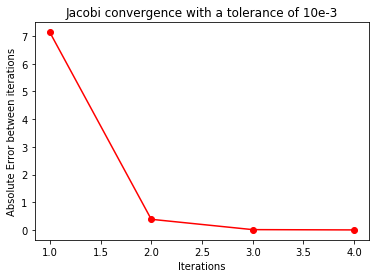

In [57]:
iterations = list(range(0,10))

plt.title("Jacobi convergence with a tolerance of 10e-3")
plt.xlabel("Iterations")
plt.ylabel("Absolute Error between iterations")
plt.plot(iterations[1:5], jacobi1_conv, 'r', marker='o')

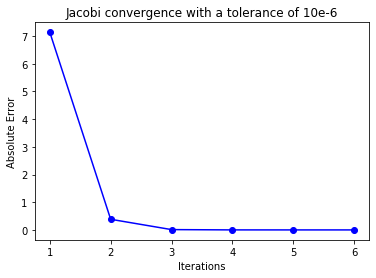

In [58]:
plt.title("Jacobi convergence with a tolerance of 10e-6")
plt.xlabel("Iterations")
plt.ylabel("Absolute Error")
plt.plot(iterations[1:7], jacobi2_conv, 'b', marker='o')

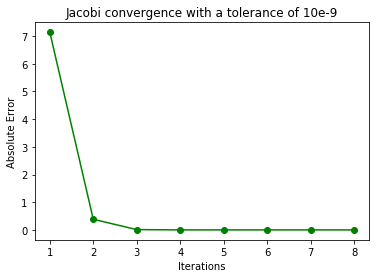

In [59]:
plt.title("Jacobi convergence with a tolerance of 10e-9")
plt.xlabel("Iterations")
plt.ylabel("Absolute Error")
plt.plot(iterations[1:9], jacobi3_conv, 'g', marker='o')

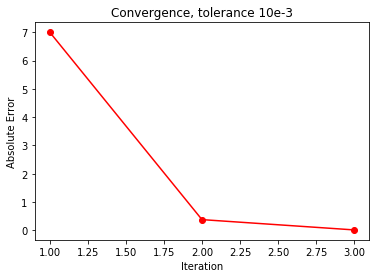

In [60]:
#Gauss-Seidel Graphs
plt.title("Gauss-Seidel convergence with a tolerance of 10e-3")
plt.xlabel("Iterations")
plt.ylabel("Absolute Error")
plt.plot(iterations[1:4], gauss1_conv, 'r', marker='o')

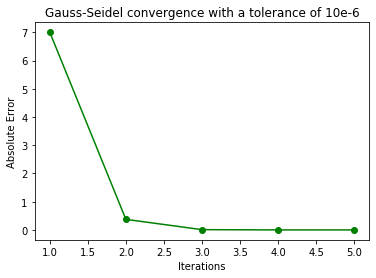

In [63]:
plt.title("Gauss-Seidel convergence with a tolerance of 10e-6")
plt.xlabel("Iterations")
plt.ylabel("Absolute Error")
plt.plot(iterations[1:6], gauss2_conv, 'g', marker='o')

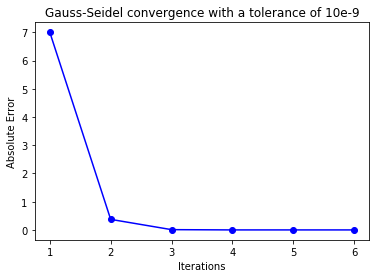

In [65]:
plt.title("Gauss-Seidel convergence with a tolerance of 10e-9")
plt.xlabel("Iterations")
plt.ylabel("Absolute Error")
plt.plot(iterations[1:7], gauss3_conv, 'b', marker='o')

In [1]:
#The smaller the tolerance, the more iterations that are needed to make
#the program reach the increasingly strict threshold of the error.